In [43]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [68]:
stage = 'singleshower'
#name = '$\pi^0$'
name = 'Single Shower'

f_full = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_full.root'
f_sel2 = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_sel2.root'
f_pc = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/MCVars_%s.root'%stage

a_full = rn.root2array(f_full,treename='pi0_tree')
a_sel2 = rn.root2array(f_sel2,treename='pi0_tree')
a_pc = rn.root2array(f_pc,treename='pi0_tree')

df_full = pd.DataFrame(a_full)
df_sel2 = pd.DataFrame(a_sel2)
df_pc = pd.DataFrame(a_pc)


In [69]:
df_full.head()

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,true_mu_mom,true_mu_len,true_mu_theta,true_mu_phi,event
0,202.126709,2.387521,0.179387,-999.0,150.451340,30.743450,171.380981,106.244102,7.111246,0.922622,579.433533,185.092896,0.365230,0.919209,1073741824
1,185.768585,1.906851,0.375672,-999.0,127.633720,50.729485,135.036636,9.693301,6.651888,1.185024,582.680603,210.190674,0.649000,-1.287647,1106247680
2,1062.791748,0.264940,0.569000,-999.0,1054.185303,385.422913,677.368347,38.045124,17.842146,1.659600,272.581024,68.154808,1.222031,2.394143,1121714176
3,208.885605,2.392619,0.163003,-999.0,159.416428,29.276468,179.606934,89.669319,0.697521,0.933298,307.554657,86.863235,1.430095,-2.956397,1131937792
4,188.046387,1.601411,0.975596,-999.0,130.926865,92.860550,95.183403,6.139203,15.042186,0.750084,115.388985,11.137944,2.298759,-0.853172,1132134400


In [70]:
def makePlots(var,var_min,var_max,nbins=20,xlabel=''):

    mom_full, bin_full = np.histogram(df_full[var].values,bins=20,range=(var_min,var_max) )
    mom_sel2, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(var_min,var_max) )
    mom_pc, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(var_min,var_max) )
    
    bins = (bin_full[:-1] + bin_full[1:])/2
    err_effx = 0.5 * (bins[1] - bins[0])
    err_full_y = np.sqrt(mom_full)
    err_sel2_y = np.sqrt(mom_sel2)
    err_pc_y = np.sqrt(mom_pc)

    # Efficiency
    sel2_eff = [float(mom_sel2[i])/mom_full[i] if mom_full[i] != 0. else 0. for i in xrange(len(mom_sel2))]
    pc_eff = [float(mom_pc[i])/mom_full[i] if mom_full[i] != 0. else 0. for i in xrange(len(mom_pc))]

    err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./mom_sel2[i] + 1./mom_full[i]) \
            if mom_full[i] != 0. and sel2_eff[i] !=0 else 0. for i in xrange(len(bins))]

    err_effpc_y = [ pc_eff[i] * math.sqrt(1./mom_pc[i] + 1./mom_full[i]) \
            if mom_full[i] != 0. and pc_eff[i] !=0 else 0. for i in xrange(len(bins))]
        
    plt.figure(figsize=(8,6))
    plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='All in 2.3E20')
    plt.errorbar(bins,mom_sel2,yerr=err_sel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
    plt.errorbar(bins,mom_pc,yerr=err_pc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='%s Cuts' % name)
    plt.grid(True)
    #plt.title('True $\pi^0$ Momentum',fontsize=20,weight='bold') 
    plt.xlabel(xlabel,fontsize=20,weight='bold')
    plt.ylabel('Number of Events',fontsize=20,weight='bold')
    plt.legend(loc=0) #loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)
    plt.xlim(var_min,var_max)
    plt.savefig('Plots/MCVar_%s_%s'%(stage,var))

    plt.figure(figsize=(8,6))
    plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
    plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='%s Cuts'%name)
    plt.grid(True)
    #plt.title('Efficiency vs True $\pi^0$ Momentum',fontsize=20,weight='bold')
    plt.xlabel(xlabel,fontsize=20,weight='bold')
    plt.ylabel('Efficiency',fontsize=20,weight='bold')
    plt.legend(loc=0) #'center left', bbox_to_anchor=(0.3,0.8),fontsize=14)
    plt.ylim(0,1.)
    plt.xlim(var_min,var_max)
    #plt.savefig('Plots/MCVar_Pi0MomEff.png')
    plt.savefig('Plots/MCVar_eff_%s_%s'%(stage,var))
    

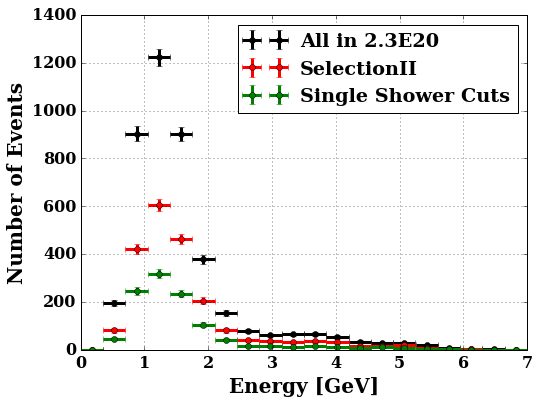

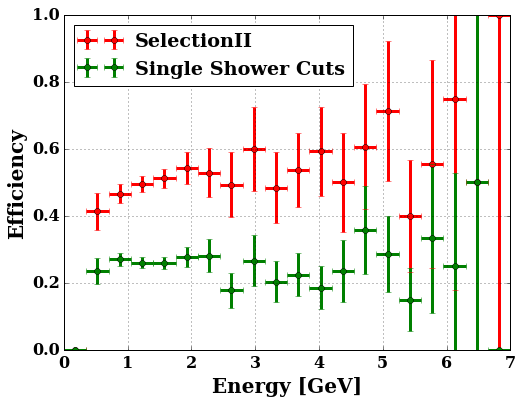

In [71]:
makePlots('true_nu_e',0,7.,xlabel='Energy [GeV]')


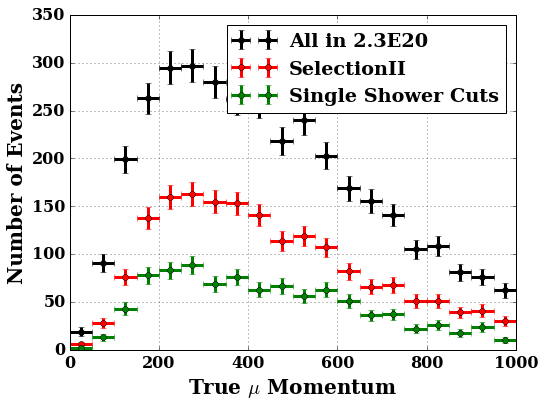

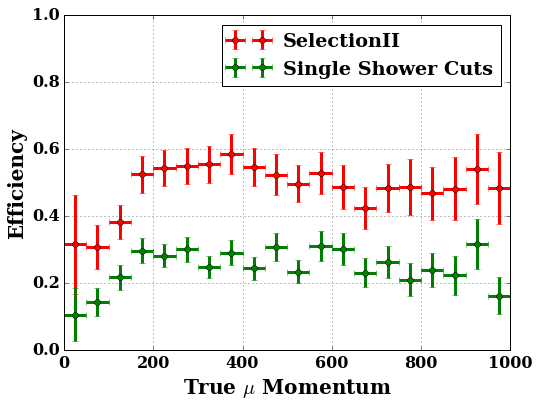

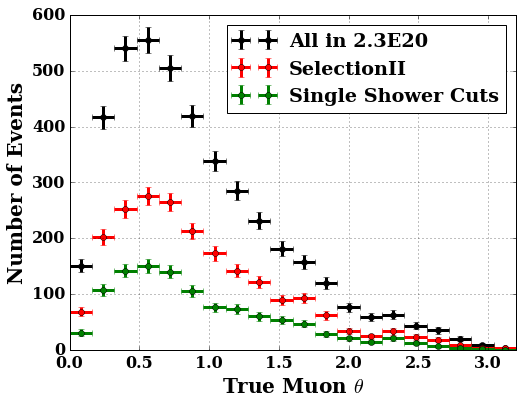

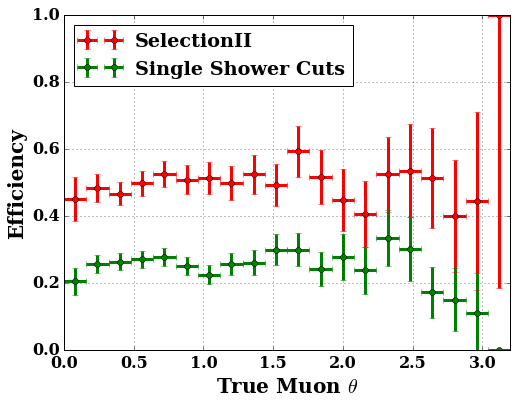

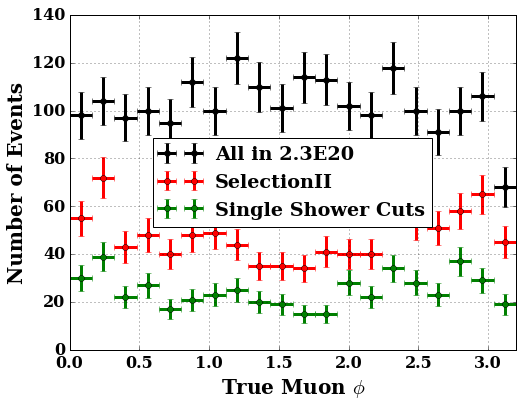

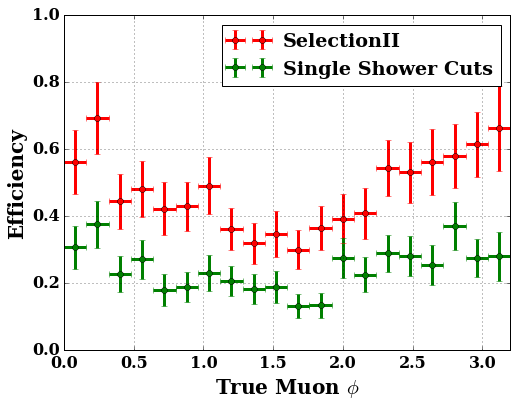

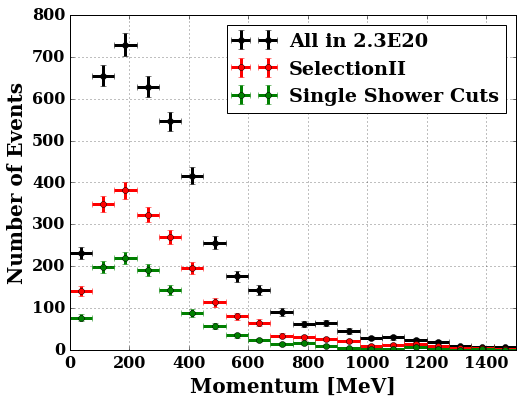

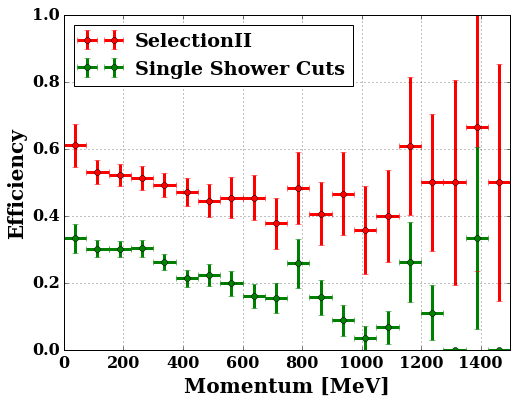

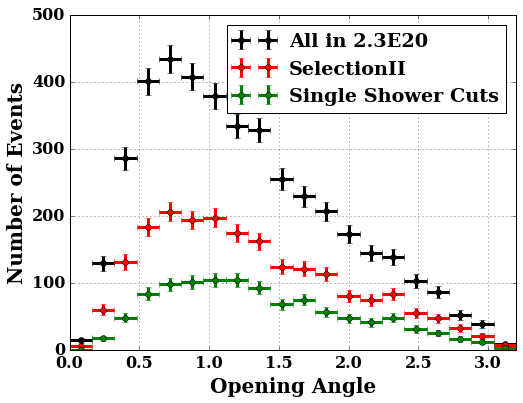

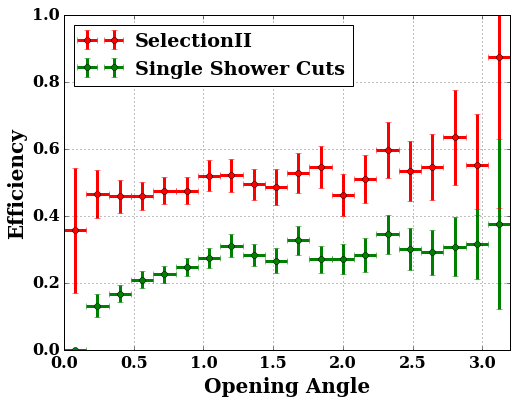

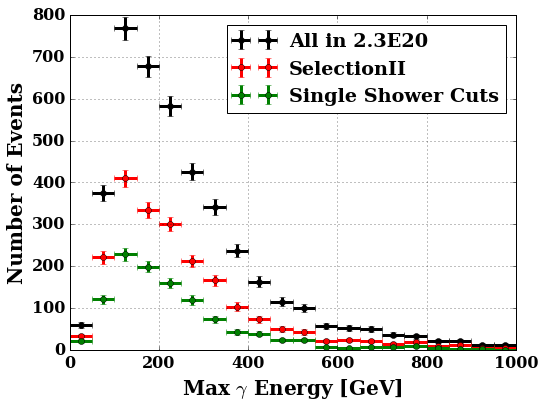

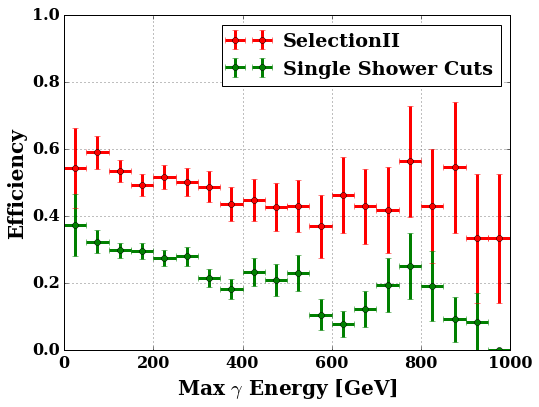

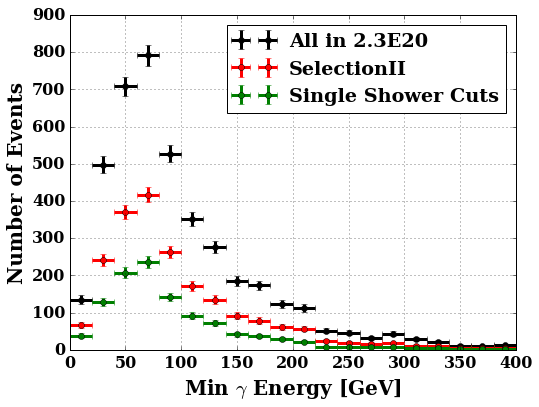

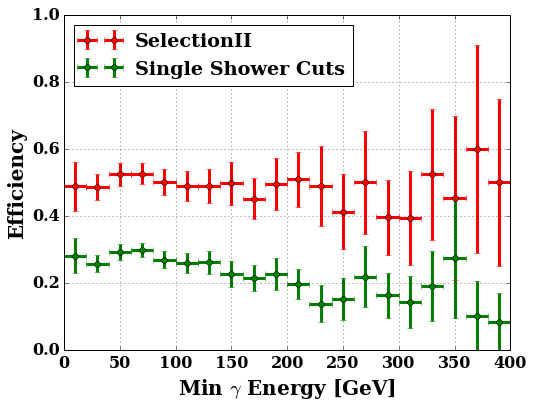

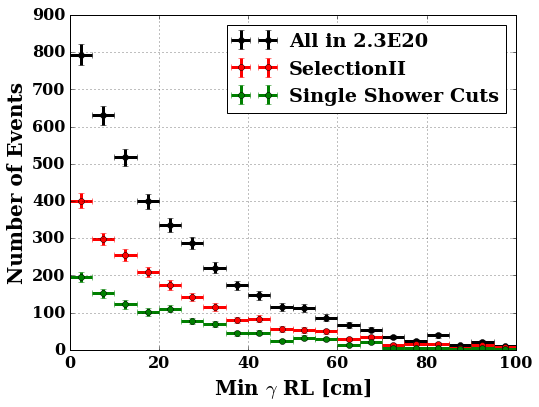

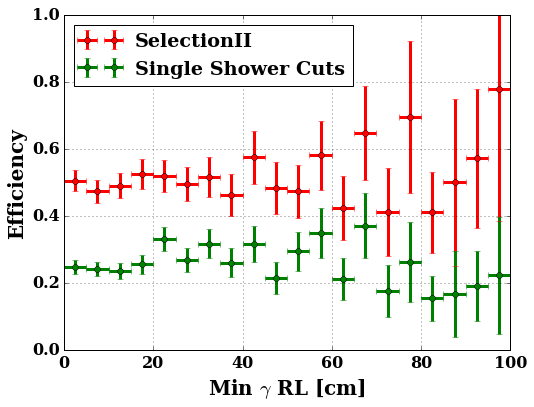

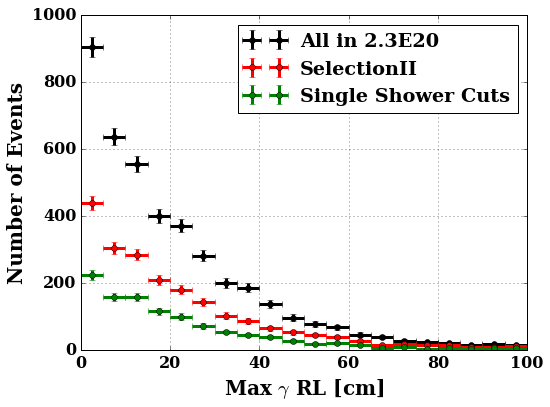

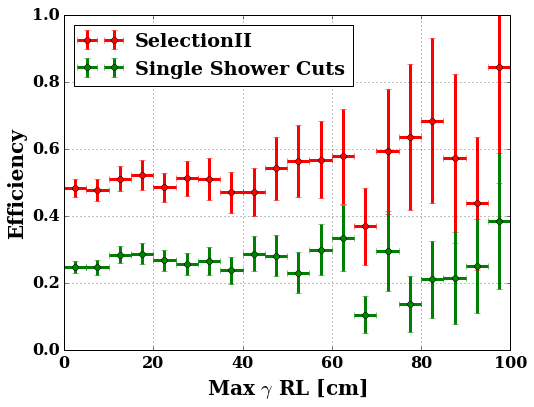

In [72]:
makePlots('true_mu_mom',0,1000,xlabel='True $\mu$ Momentum')
makePlots('true_mu_theta',0,3.2,xlabel='True Muon $\\theta$')
makePlots('true_mu_phi',0,3.2,xlabel='True Muon $\\phi$')
makePlots('true_pi0_mom',0,1500,xlabel='Momentum [MeV]')
makePlots('true_angle',0,3.2,xlabel='Opening Angle')
makePlots('true_gamma_e_max',0,1000,xlabel='Max $\gamma$ Energy [GeV]')
makePlots('true_gamma_e_min',0,400,xlabel='Min $\gamma$ Energy [GeV]')
makePlots('true_RL_minE',0,100,xlabel='Min $\gamma$ RL [cm]')
makePlots('true_RL_maxE',0,100,xlabel='Max $\gamma$ RL [cm]')